In [1]:
import json
import math
import numpy as np

from jupyterthemes import jtplot
jtplot.style(theme = "oceans16")

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import pandas as pd

In [2]:
# [CODE 0]

def r_scatter(tour_table, visit_table, tourpoint):
    
    tour = tour_table[tour_table['resNm'] == tourpoint]
    merge_table = pd.merge(tour, visit_table, left_index=True, right_index=True)

    r1 = correlation(list(merge_table['china']), list(merge_table['ForNum']))
    
    r2 = correlation(list(merge_table['japan']), list(merge_table['ForNum']))

    r3 = correlation(list(merge_table['usa']), list(merge_table['ForNum']))

    k = [tourpoint, r1, r2, r3]
    
    return(k)

In [3]:
# [CODE 1]

def correlation(x, y):
    n = len(x)
    vals = range(n)

    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0

    for i in vals:
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow + pow(float(x[i]), 2)
        y_sum_pow = y_sum_pow + pow(float(y[i]), 2)

    try:
        r = ((n * mul_xy_sum) - (x_sum * y_sum)) / math.sqrt(
            ((n * x_sum_pow) - pow(x_sum, 2)) * ((n * y_sum_pow) - pow(y_sum, 2)))
    except:
        r = 0.0

    return r

In [4]:
# [CODE 2]

def setScatterGraph(tour_table, visit_table, tourpoint):
    
    # [CODE 8]
    tour = tour_table[tour_table['resNm'] == tourpoint]
    merge_table = pd.merge(tour, visit_table, left_index=True, right_index=True)

    fig = plt.figure()

    fig.suptitle(tourpoint + '상관관계 분석')
    
    
    plt.subplot(1, 3, 1)
    plt.xlabel('중국인 입국수')
    plt.ylabel('외국인 입장객수')
    r1 = correlation(list(merge_table['china']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r1))
    plt.scatter(list(merge_table['china']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='white')
    
    
    plt.subplot(1, 3, 2)
    plt.xlabel('일본인 입국수')
    plt.ylabel('외국인 입장객수')
    r2 = correlation(list(merge_table['japan']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r2))
    plt.scatter(list(merge_table['japan']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='white')
    
    
    plt.subplot(1, 3, 3)
    plt.xlabel('미국인 입국수')
    plt.ylabel('외국인 입장객수')
    r3 = correlation(list(merge_table['usa']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r3))
    plt.scatter(list(merge_table['usa']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='white')
    
    
    plt.tight_layout()

    fig = matplotlib.pyplot.gcf()

    fig.set_size_inches(10, 7)

    fig.savefig(tourpoint+'.png', dpi=300)

    plt.show()

In [12]:
def main():
    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    # [CODE 4]

    tpFileName = '서울특별시_관광지입장정보_2011_2016.json'
    jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
    tour_table = pd.DataFrame(jsonTP, columns=('yyyymm', 'resNm', 'ForNum'))
    tour_table = tour_table.set_index('yyyymm')

    # [CODE 5]

    resNm = tour_table.resNm.unique()

    # [CODE 6]

    fv_CFileName = '중국(112)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
    china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    china_table = china_table.rename(columns={'visit_cnt': 'china'})
    china_table = china_table.set_index('yyyymm')

    fv_JFileName = '일본(130)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_JFileName, 'r', encoding='utf-8').read())
    japan_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    japan_table = japan_table.rename(columns={'visit_cnt': 'japan'})
    japan_table = japan_table.set_index('yyyymm')

    fv_UFileName = '미국(275)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_UFileName, 'r', encoding='utf-8').read())
    usa_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    usa_table = usa_table.rename(columns={"visit_cnt": "usa"})
    usa_table = usa_table.set_index('yyyymm')

    # [CODE 7]

    fv_table = pd.merge(china_table, japan_table, left_index=True, right_index=True)
    fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)

    #for tourpoint in resNm:
    #    setScatterGraph(tour_table, fv_table, tourpoint)
    global r_list
    r_list = []
    
    for tourpoint in resNm:
        r_list.append(r_scatter(tour_table, fv_table, tourpoint))
    
    return(list(r_list))
    
if __name__ == "__main__":
    main()

In [14]:
print(r_list)

[['창덕궁', 0.11517680297805839, 0.4351597161641054, 0.4991198858893025], ['운현궁', 0.5671133595743602, 0.34564059371924516, 0.44393960758693146], ['경복궁', 0.8494433232820975, -0.17004597321064757, 0.6630492838034528], ['창경궁', 0.4455478210842133, 0.040131569154568066, 0.697825001316531], ['종묘', -0.5565749721325933, 0.9123262864909116, -0.13297480141528586], ['국립중앙박물관', 0.5720400896052417, -0.15015696956339286, 0.48041196777581124], ['서울역사박물관', 0.5165375855740799, 0.1451764252531756, 0.40333736944898], ['덕수궁', 0.7149864120921465, -0.061116272552536946, 0.7199687351933926], ['서울시립미술관 본관', 0.0, 0.0, 0.0], ['태릉 ·  강릉 · 조선왕릉전시관', 0.019933863484337105, 0.2262912004195081, 0.07198595831590915], ['서대문형무소역사관', 0.5312183347973358, -0.22604543918467984, 0.2697852420164024], ['서대문자연사박물관', 0.0, 0.0, 0.0], ['트릭아이미술관', 0.5601592464577234, -0.4787520434870875, 0.27386787309379307], ['헌릉ㆍ인릉', -0.6313733265926633, 0.8472044243867891, -0.2573388025480664], ['선릉·정릉', -0.6446670996941203, 0.8343800369408283, -0.

In [15]:
r_table = pd.DataFrame(r_list, columns=('tourpoint', 'china', 'japan', 'usa'))
r_table = r_table.set_index('tourpoint')
r_table

,china,japan,usa
tourpoint,,,
창덕궁,0.115177,0.435160,0.499120
운현궁,0.567113,0.345641,0.443940
경복궁,0.849443,-0.170046,0.663049
창경궁,0.445548,0.040132,0.697825
종묘,-0.556575,0.912326,-0.132975
국립중앙박물관,0.572040,-0.150157,0.480412
서울역사박물관,0.516538,0.145176,0.403337
덕수궁,0.714986,-0.061116,0.719969
서울시립미술관 본관,0.000000,0.000000,0.000000


In [16]:
r_table.drop('서울시립미술관 본관')
r_table.drop('서대문자연사박물관')
r_table

,china,japan,usa
tourpoint,,,
창덕궁,0.115177,0.435160,0.499120
운현궁,0.567113,0.345641,0.443940
경복궁,0.849443,-0.170046,0.663049
창경궁,0.445548,0.040132,0.697825
종묘,-0.556575,0.912326,-0.132975
국립중앙박물관,0.572040,-0.150157,0.480412
서울역사박물관,0.516538,0.145176,0.403337
덕수궁,0.714986,-0.061116,0.719969
서울시립미술관 본관,0.000000,0.000000,0.000000


In [10]:
r_table.drop('서울시립미술관 본관')
r_table.drop('서대문자연사박물관')
r_table = r_table.sort_values('china', ascending=False)
r_table

,china,japan,usa
tourpoint,,,
경복궁,0.849443,-0.170046,0.663049
덕수궁,0.714986,-0.061116,0.719969
롯데월드,0.589717,0.151576,-0.110885
국립중앙박물관,0.572040,-0.150157,0.480412
운현궁,0.567113,0.345641,0.443940
트릭아이미술관,0.560159,-0.478752,0.273868
서대문형무소역사관,0.531218,-0.226045,0.269785
서울역사박물관,0.516538,0.145176,0.403337
창경궁,0.445548,0.040132,0.697825


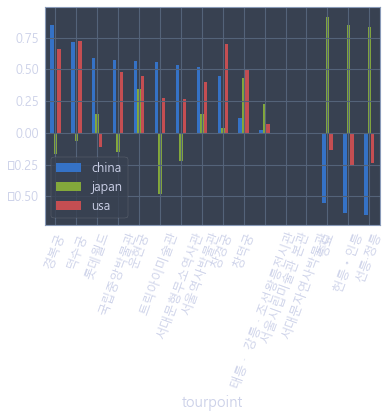

In [10]:
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
r_table.plot(kind='bar', rot=70)
plt.show()